#                       Esercitazione 4 - 14 Marzo 2023

- **1.** Verificare il sistema dei numeri di macchina gestito da Python: importare il pacchetto sys. La funzione sys.float_info dà le informazioni necessarie. Stamparle e poi verificarne la validità con le formule viste a lezione: numero minimo di macchina, numero massimo di macchina, precisione di macchina 


  **N.B.** Bisogna tenere presente che c'è l'hidden bit. Quindi la mantissa più piccola da considerare $M=1.m$ dove $m=0$. Quindi il numero minimo ha mantissa $1.0$ e parte esponente $\beta^L$, quindi e' dato da $1.0 \beta^L= \beta^L$.
  
   Ragionate voi per calcolare il numero massimo di macchina, tenendo conto dell'hidden bit.


In [1]:
import sys
print(sys.float_info)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


In [2]:
sys.float_info.mant_dig

53

In [6]:
beta = 2.0
L = sys.float_info.min_exp - 1
U = sys.float_info.max_exp - 1
amin = beta**(L)
print("Alfa_min = ", amin)

Alfa_min =  2.2250738585072014e-308


In [8]:
t = 52
#amax = beta**U - beta**(U-t) nel caso in cui non si consideri il bit nascosto
amax = beta**U * (2 - beta**(-t))
print("Alfa_max = ", amax)

Alfa_max =  1.7976931348623157e+308


In [19]:
t = 53
eps = beta**(1-t)  # eps = beta**(p+1-t)  dove [beta**p, beta**(p+1)]
print("eps(precisione di macchina) = ", eps)

eps(precisione di macchina) =  2.220446049250313e-16


- **2.**  Calcolare lo spacing in  $[2^{52}, 2^{53}]$.
    - Sia $x=2^{52}$ individuare il numero successivo a $2^{52}$ ed assegnarlo ad una variabile  y.
    - Cosa succede se consideriamo il valore z=x+0.5?
    - Cosa succede se consideriamo il valore q=y+0.5?
  

In [23]:
s = beta**(53-t)
print("Spacing = ", s)
x = float(2**52)
print("x = ", x)
y = x + s
print("y = ", y)
z = x + 0.5  # z = x perchè viene arrotondato ai pari
print("z = ", z)
q = y + 0.5
print("q = ", q)  # q = y + 1 perchè viene arrotondato ai pari

Spacing =  1.0
x =  4503599627370496.0
y =  4503599627370497.0
z =  4503599627370496.0
q =  4503599627370498.0


- **3** Calcolare la cardinalità dell'insieme dei numeri finiti di Python

In [21]:
card = 2*(beta**(t-1)*(beta-1)*(U-L+1)) + 1
print("Cardinalità numeri finiti = ", card)

Cardinalità numeri finiti =  1.842872967520007e+19


- **4**  Verificare numericamente che $\texttt{eps} = 2^{-52}$, spacing nell'intervallo $[1, 2]$,
è il piu' piccolo $x$ tale che $fl(1 + x)$ è  diverso da $1$. Si consiglia di
visualizzare i risultati anche per differenza.


In [25]:
eps = 2**(-52)
s = sys.float_info.epsilon
x = eps
print("fl(1+x) = ", 1+x)

fl(1+x) =  1.0000000000000002


- **5.** Siano $a=1.234567890123400 e+15$, $b=-1.234567890123401 e+15$, $c=0.06$. 
  Calcolare $(a+b)+c$, $(a+c)+b$, $a+(b+c)$. Che cosa si osserva? Ripetere l'esercizio con $a=0.23371258 e-4$, $b=0.33678429 e+2$, $c=-0.33677911 e+2$.

In [32]:
a = 1.234567890123400e+15
b = -1.234567890123401e+15
c = 0.06
print("PRIMO CASO")
ris = (a+b)+c
print("ris1 = ", ris)
ris = (a+c)+b
print("ris2 = ", ris)
ris = a+(b+c)
print("ris3 = ", ris)
#Nel primo caso il primo risultato è diverso dagli altri due 
a = 0.23371258e-4
b = 0.33678429e+2
c = -0.33677911e+2
print("SECONDO CASO")
ris = (a+b)+c
print("ris1 = ", ris)
ris = (a+c)+b
print("ris2 = ", ris)
ris = a+(b+c)
print("ris3 = ", ris)
#Nel secondo caso i primi due risultati sono uguali, mentre il terzo è diverso

PRIMO CASO
ris1 =  -0.94
ris2 =  -1.0
ris3 =  -1.0
SECONDO CASO
ris1 =  0.0005413712580022434
ris2 =  0.0005413712580022434
ris3 =  0.0005413712579995743


- **6.** Si considerino le espressioni $y_1=\sqrt{x^2+1}-x$ e $y_2=\frac{1}{\sqrt{x^2+1}+x}$. Calcolare il valore di $y_1$ e $y_2$ per $x=7777$ e $x=77777777$. Che cosa si osserva? Commentare i risultati ottenuti.

In [6]:
import math
x = 7777
y1 = math.sqrt(x**2 + 1) - x
y2 = 1 / (math.sqrt(x**2 + 1) + x)
print("y1 = ", y1)
print("y2 = ", y2)
x2 = 77777777
y3 = math.sqrt(x2**2 + 1) - x2
y4 = 1 / (math.sqrt(x2**2 + 1) + x)
print("y3 = ", y3)
print("y4 = ", y4)

y1 =  6.429214317904552e-05
y2 =  6.429214323431402e-05
y3 =  0.0
y4 =  1.2855857528507157e-08


- **7.** Valutare in aritmetica floating point l'espressione
$$A(x)=\frac{1}{x}-\frac{1}{(x+1)}$$  nel vettore   $x=[10^0, 10^1,... ,10^{20}]$ contenente potenze successive  di $10$,  Si calcoli per ogni elemento di x l'errore relativo considerando come valore esatto quello calcolato usando  l'espressione algebricamente equivalente
$$
B(x)=\frac{1}{x (x+1)}.
$$ Si visualizzi l'errore relativo in un grafico in scala logaritmica su $x$ e $y$

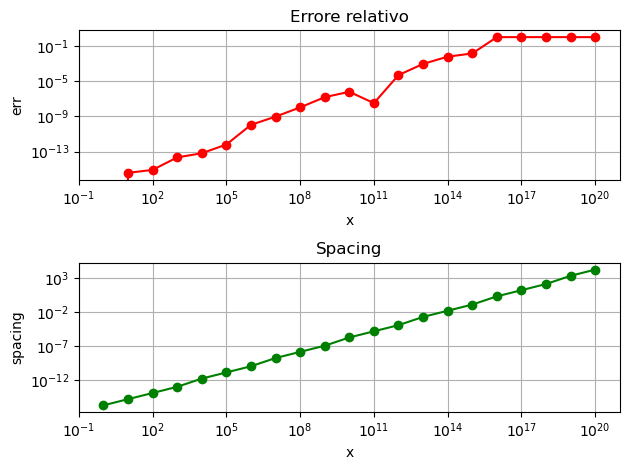

In [38]:
import matplotlib.pyplot as plt
import numpy as np

A = lambda x: 1/x - 1/(x+1)

B = lambda x: 1/(x*(x+1))

x = 10.0**np.arange(0, 21)
s = np.spacing(x)
err = np.copy(x)
err = np.abs(B(x) - A(x)) / np.abs(B(x))

plt.subplot(2,1,1)
plt.title("Errore relativo")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("err")
plt.loglog(x, err, "r-o")
plt.subplot(2,1,2)
plt.loglog(x, s, "g-o")
plt.title("Spacing")
plt.xlabel("x")
plt.ylabel("spacing")
plt.grid(True)
plt.tight_layout()
plt.show()

- **8-**  Quali problemi si possono incontrare nel calcolo delle radici di $a x^2+b x+c$? Provare a risolvere l'equazione $x^2+10^k x+1=0$ con k in range(1,9). Che cosa si osserva?

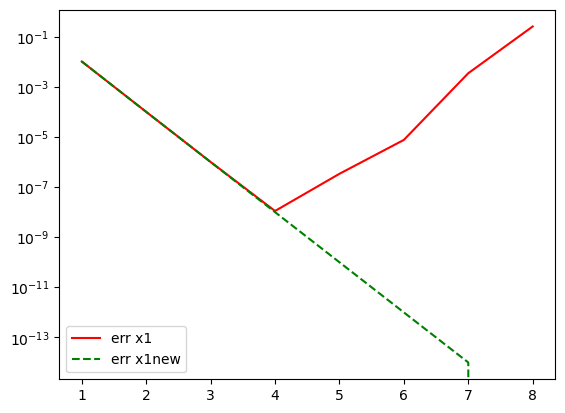

In [52]:
a = 1
c = 1
k = np.arange(1,9)
b = 10.0**k

delta = b**2 - 4*a*c

x1 = (-b + np.sqrt(delta)) /(2*a)
x2 = (-b - np.sqrt(delta))/(2*a)

#Calcolando x1 in questo modo evitiamo che si annulli
x1new = (a*c)/x2

#La radice di x1 in aritmetica reale
x1vera = -10.0**(-k)

err_rel_x1 = np.abs(x1 - x1vera)/np.abs(x1vera)
err_rel_x1new = np.abs(x1new - x1vera)/np.abs(x1vera)

plt.semilogy(k, err_rel_x1, "r-", k, err_rel_x1new, "g--")
plt.legend(["err x1", "err x1new"])
plt.show()
#Questa differenza negli errori relativi e' dovuta allo spacing o alla radice

- **9.** Scrivere uno script Matlab che fornisca le approssimazioni di $e=\exp(1)$ ottenute con la formula
$f(n)=(1/n+1)^n$ per $n=10^k$ e  $k=0, ..., 16$. Visualizzare: un grafico con i valori di $f(n)$ al variare di n ed un grafico con i valori dell'errore relativo (considerando come valore esatto il valore math.exp(1)).  Cosa si osserva? Commentare i risultati ottenuti.